In [280]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Heart Disease Prediction
### Will a patient have a 10 year risk of developing a cardio vascular diseases?

### Table of contents
1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Feature Selection](#paragraph2)
4. [Feature Scaling](#paragraph3)
5. [Test - Train Split](#paragraph4)
6. [Resampling](#paragraph5)
7. [Model Pipeline](#paragraph6)
8. [Modelling & Evaluation](#paragraph7)
9. [Apply model](#paragraph8)

## Introduction <a name="introduction"></a>

**Problem:**
The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

**Source:**
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Attributes:**

#### Demographic: 
* Sex: male or female(Nominal) 
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
* Education: no further information provided

#### Behavioral: 
* Current Smoker: whether or not the patient is a current smoker (Nominal) 
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

#### Information on medical history: 
* BP Meds: whether or not the patient was on blood pressure medication (Nominal) 
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
* Diabetes: whether or not the patient had diabetes (Nominal) 

#### Information on current medical condition: 
* Tot Chol: total cholesterol level (Continuous) 
* Sys BP: systolic blood pressure (Continuous) 
* Dia BP: diastolic blood pressure (Continuous) 
* BMI: Body Mass Index (Continuous) 
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
* Glucose: glucose level (Continuous) 

#### Target variable to predict: 
* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


In [1]:
# importing libraries and magic functions

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

## Exploratory Data Analysis *<a name="paragraph1"></a>*

In [2]:
# read data
df = pd.read_csv('framingham.csv')

# first glimpse at data
df.head(20)

# data shape
df.shape

# data types
df.dtypes

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


(4240, 16)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [3]:
# check for dupicates
duplicate_df = df[df.duplicated()]
duplicate_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [4]:
# checking for missing values
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
49,1,36,3.0,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
54,0,39,2.0,1,20.0,0.0,0,0,0,209.0,115.0,75.0,22.54,90.0,NaN,0
70,0,63,4.0,0,0.0,0.0,0,0,0,248.0,164.5,76.0,29.35,70.0,NaN,0
72,0,37,NaN,0,0.0,0.0,0,0,0,200.0,119.0,79.0,33.29,67.0,87.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002814DEAC5F8>,
      dtype=object)

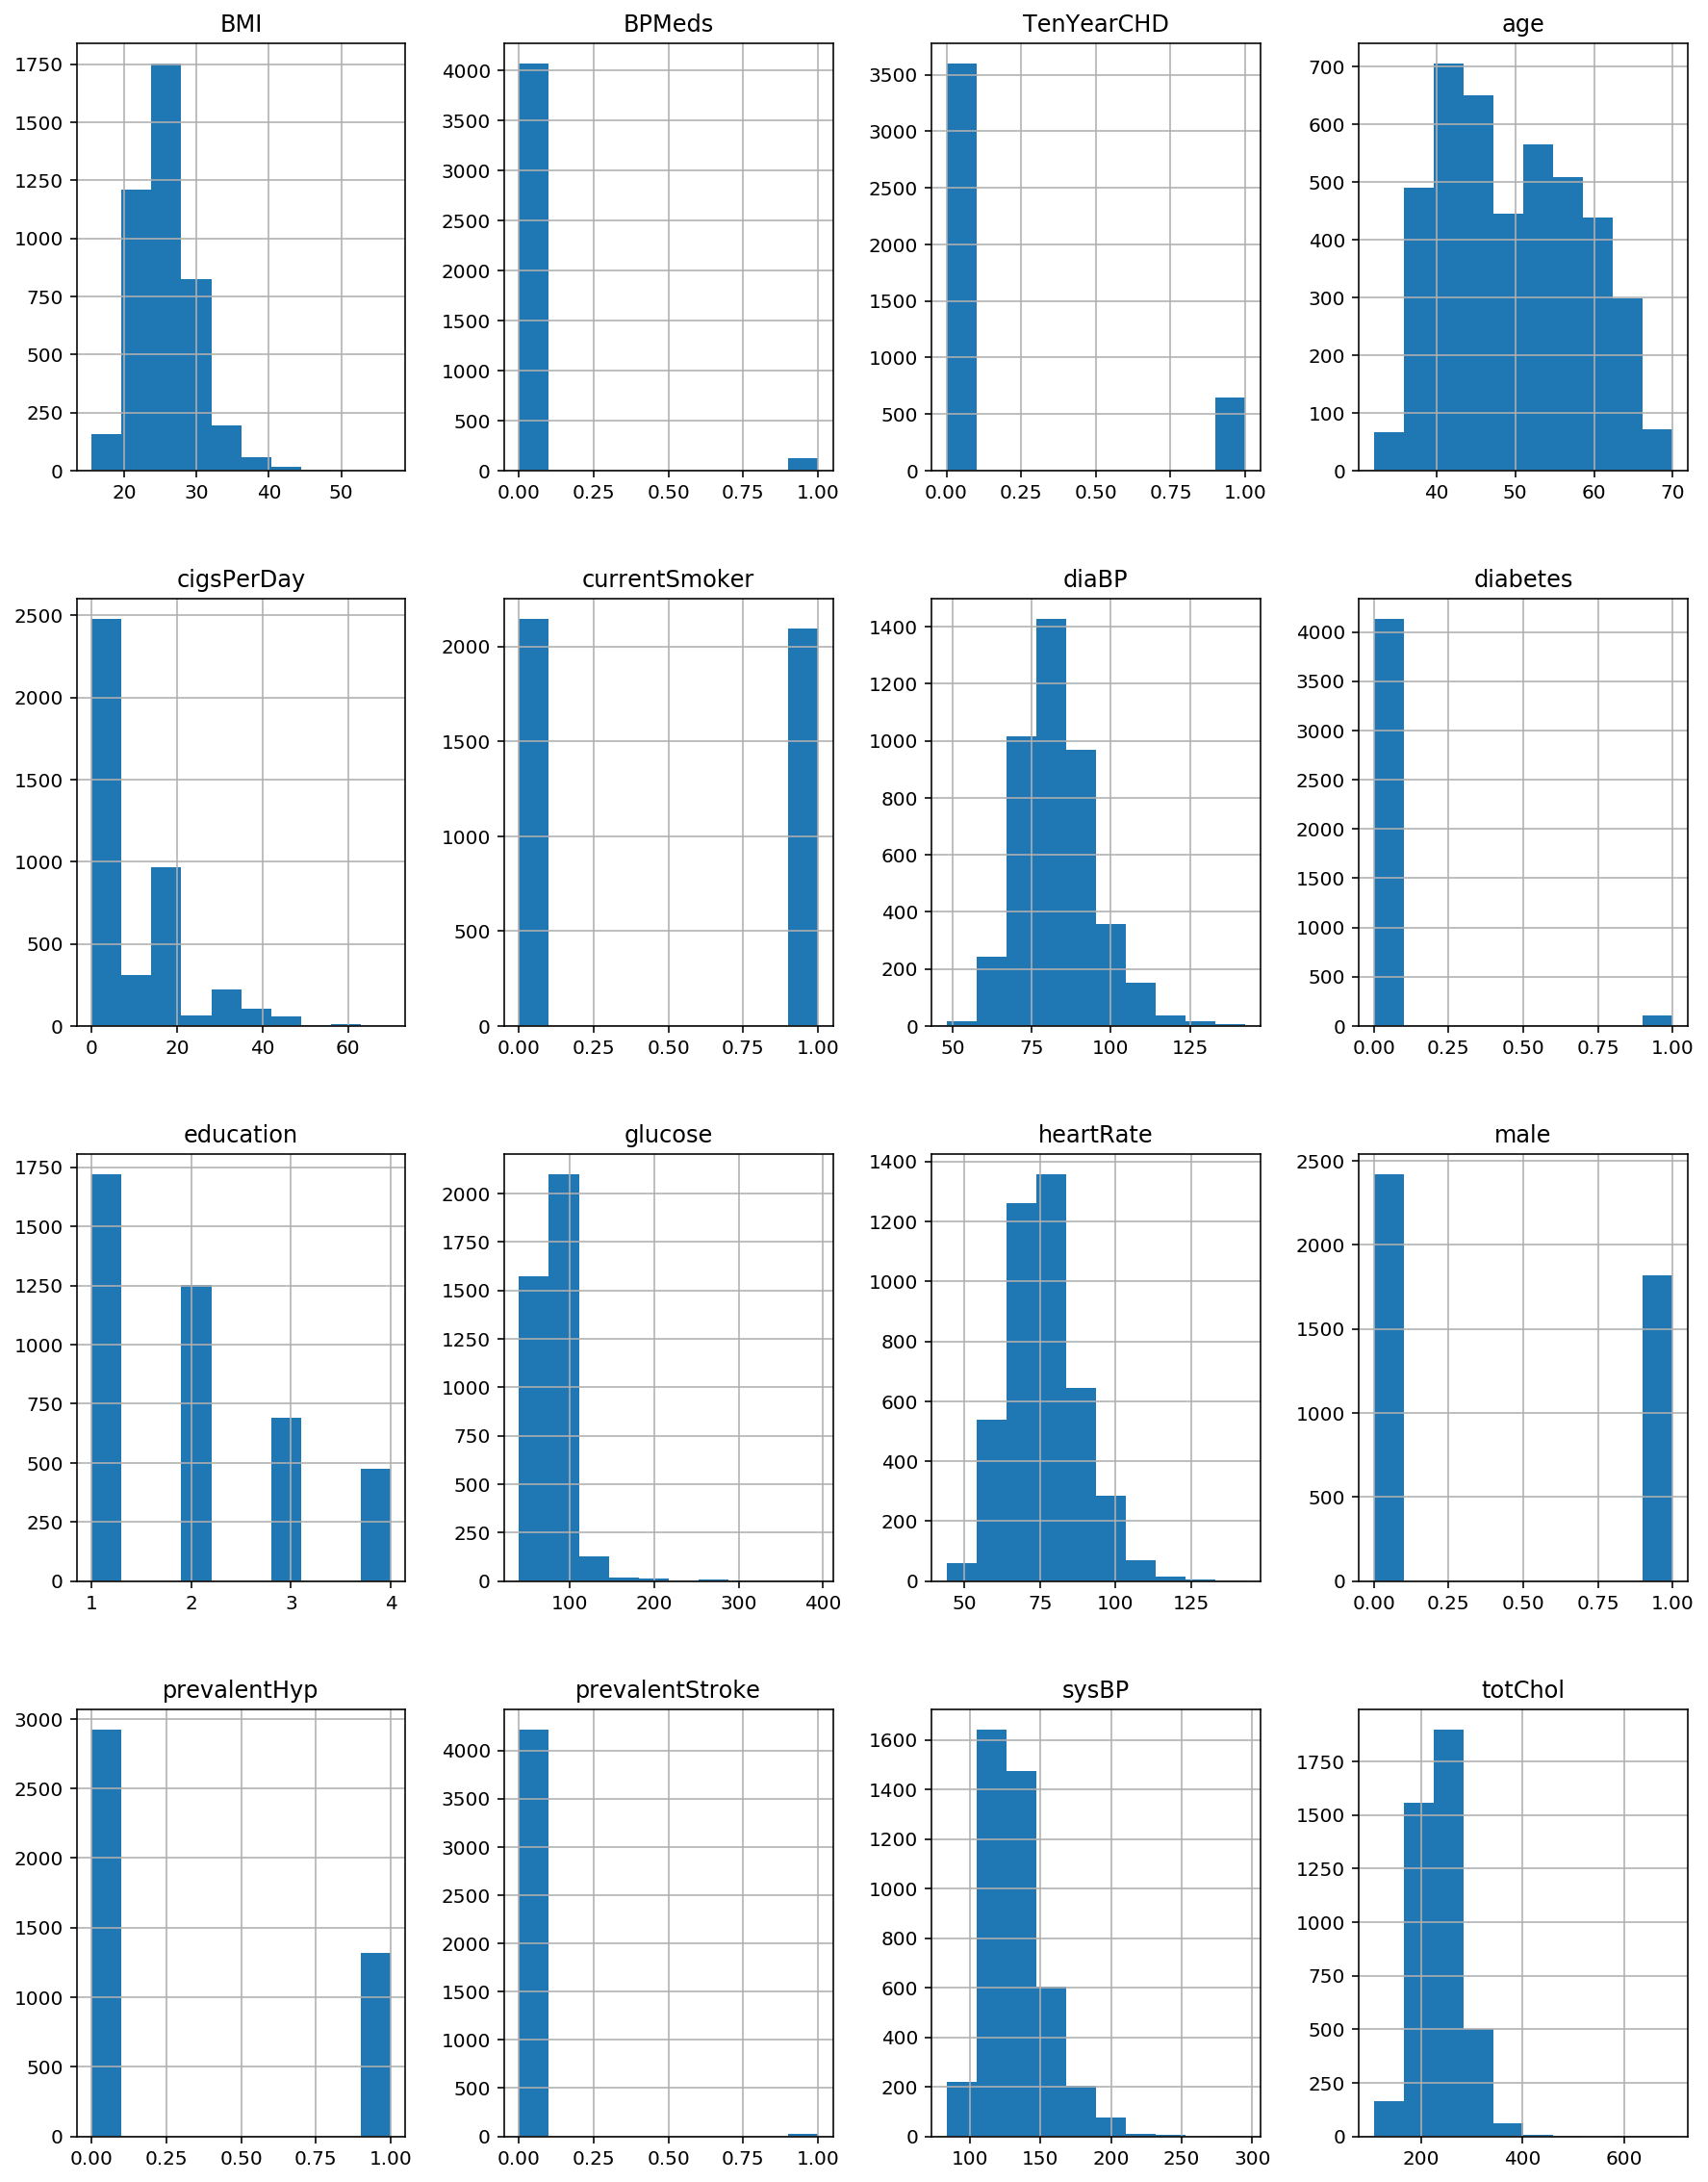

In [5]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029014   0.017415       0.197026    0.317143   
age             -0.029014  1.000000  -0.166356      -0.213662   -0.192959   
education        0.017415 -0.166356   1.000000       0.018528    0.008323   
currentSmoker    0.197026 -0.213662   0.018528       1.000000    0.769774   
cigsPerDay       0.317143 -0.192959   0.008323       0.769774    1.000000   
BPMeds          -0.052504  0.123052  -0.010898      -0.048927   -0.046155   
prevalentStroke -0.004550  0.057679  -0.035142      -0.032980   -0.032711   
prevalentHyp     0.005853  0.306799  -0.081726      -0.103710   -0.066645   
diabetes         0.015693  0.101314  -0.038749      -0.044285   -0.037089   
totChol         -0.070413  0.262554  -0.023613      -0.046488   -0.026479   
sysBP           -0.035879  0.394053  -0.129496      -0.130281   -0.088797   
diaBP            0.058199  0.205586  -0.061919      -0.107933   -0.056715   

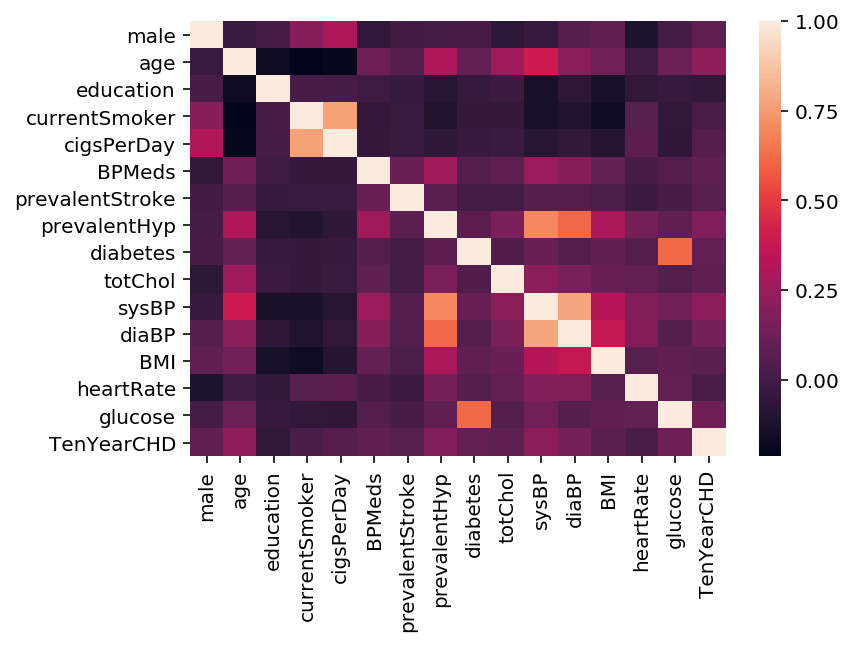

In [6]:
# checking which features are correlated with each other and are correlated with the outcome variable
df_corr = df.corr()
sns.heatmap(df_corr)
print(df_corr)

**Conclusions from Heatmap:**

We are dropping the column *education* because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The features is not correlated to the outcome variable. In that case we would have kept them.

In [7]:
# Dropping columns education 
df = df.drop(['education'], axis=1)

In [8]:
# Checking for more missing data 
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Feature Selection *<a name="paragraph2"></a>*

In [10]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
11           BMI   17.108210


In [11]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,667.109932
13,glucose,402.409837
1,age,297.974980
8,totChol,252.958627
3,cigsPerDay,185.115196
10,diaBP,142.920436
6,prevalentHyp,82.342164
7,diabetes,31.711253
4,BPMeds,26.116583
0,male,19.178560


<Figure size 1440x360 with 0 Axes>

Text(0.5,1,'Feature importance')

Text(0.5,0,'\n Features')

Text(0,0.5,'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

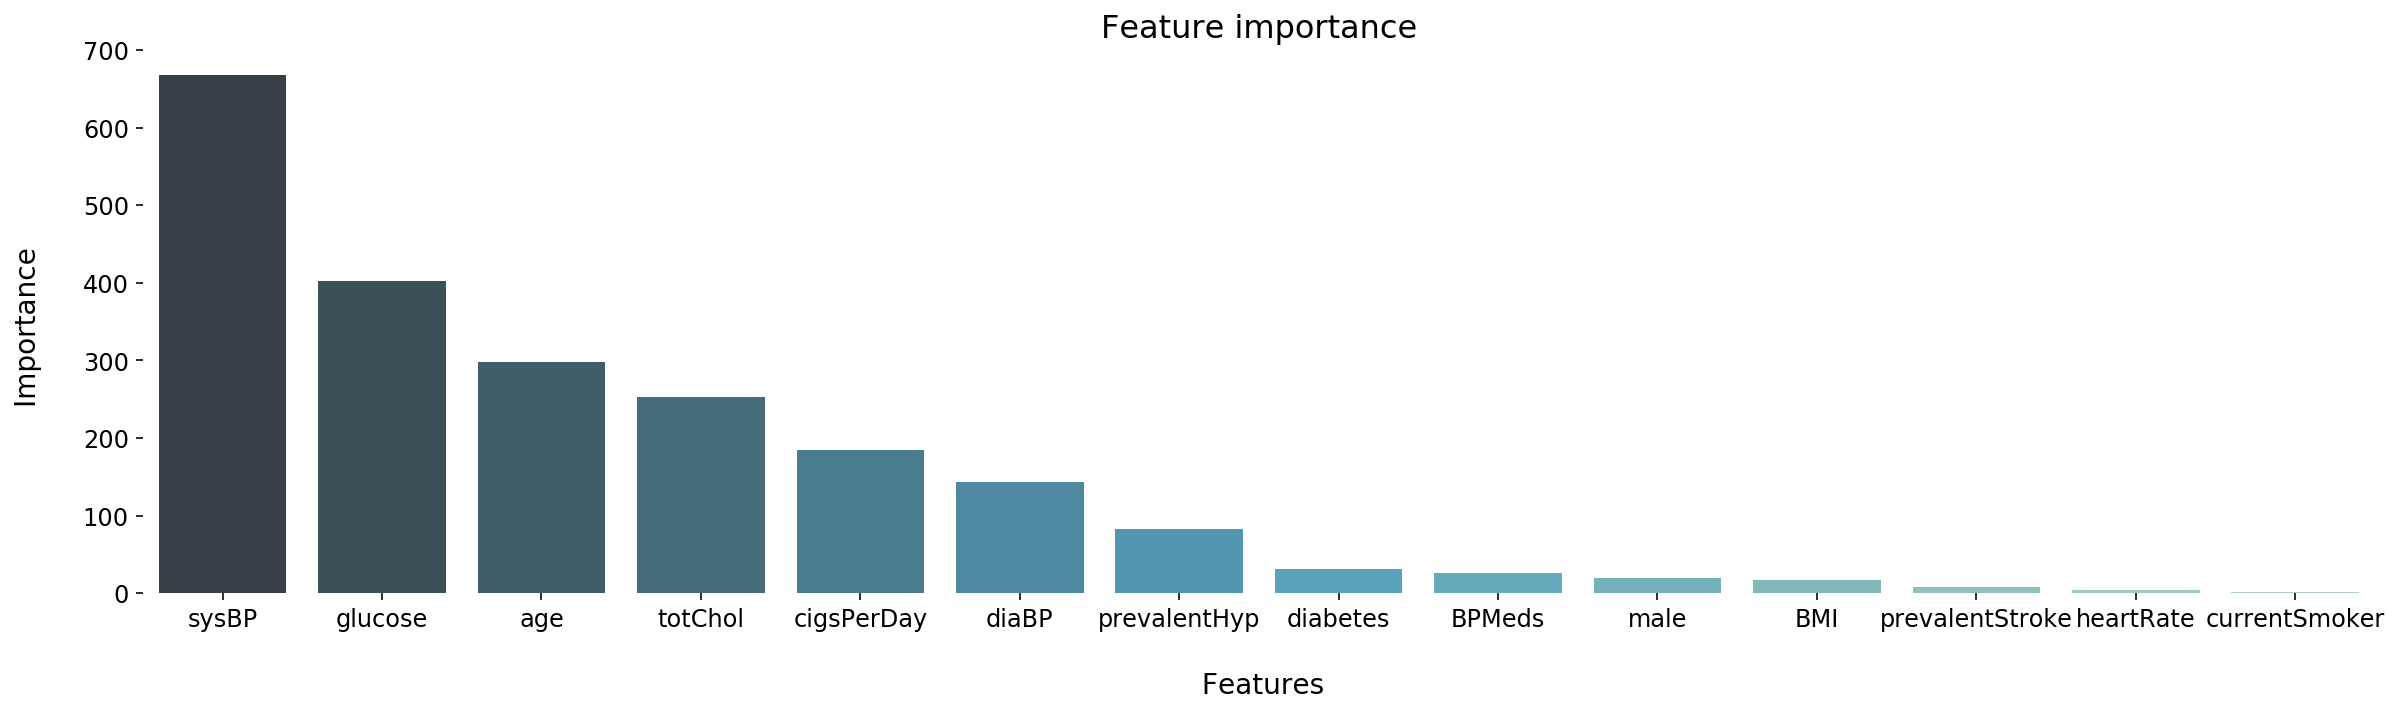

In [12]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

We will only keep those features that have the strongest relationship with the output variable. These features are:
- Systolic Blood Pressure
- Glucose
- Age
- Cholesterin
- Cigarettes per Day
- Diastolic Blood Pressure
- Hypertensive
- Diabetes
- Blood Pressure Medication
- Gender

In [14]:
# Create new dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


                 sysBP   glucose       age   totChol  cigsPerDay     diaBP  \
sysBP         1.000000  0.132878  0.388280  0.216375   -0.092310  0.785853   
glucose       0.132878  1.000000  0.118529  0.046902   -0.055090  0.061731   
age           0.388280  0.118529  1.000000  0.261443   -0.188804  0.205191   
totChol       0.216375  0.046902  0.261443  1.000000   -0.030600  0.169811   
cigsPerDay   -0.092310 -0.055090 -0.188804 -0.030600    1.000000 -0.056202   
diaBP         0.785853  0.061731  0.205191  0.169811   -0.056202  1.000000   
prevalentHyp  0.697849  0.085776  0.305292  0.164645   -0.067470  0.616753   
diabetes      0.104393  0.616087  0.109321  0.047453   -0.039436  0.051761   
BPMeds        0.269479  0.052464  0.131690  0.089625   -0.046625  0.199282   
male         -0.044515  0.003130 -0.024142 -0.067595    0.325886  0.053890   
TenYearCHD    0.220108  0.124117  0.231584  0.089613    0.055920  0.148994   

              prevalentHyp  diabetes    BPMeds      male  TenYe

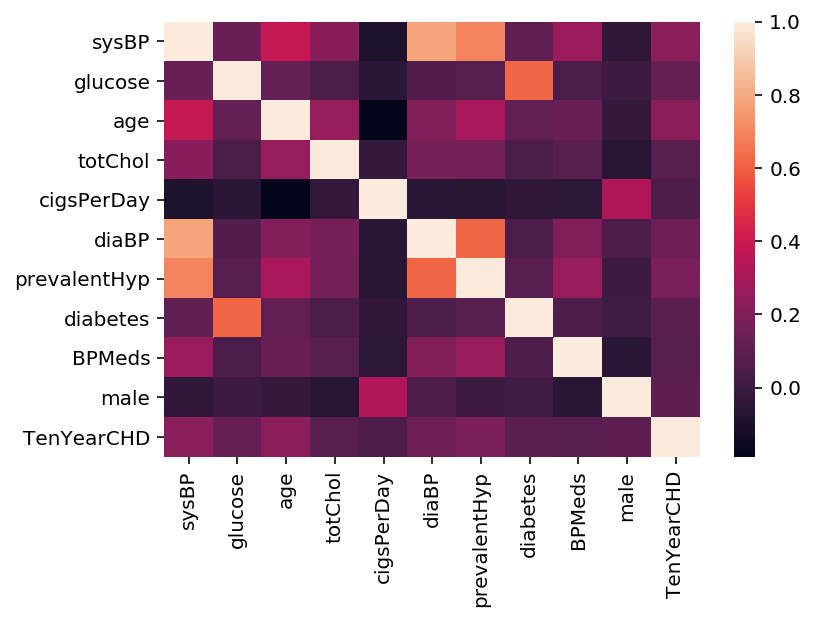

In [15]:
# Checking correlation again
df_corr = df.corr()
print(df_corr)
sns.heatmap(df_corr)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,132.368435,81.880032,49.573447,236.928019,9.008531,82.938550,0.311917,0.027193,0.030392,0.445215,0.152493
std,22.046522,23.882233,8.570204,44.611594,11.925097,11.932779,0.463338,0.162666,0.171686,0.497056,0.359546
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,87.000000,56.000000,264.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,696.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


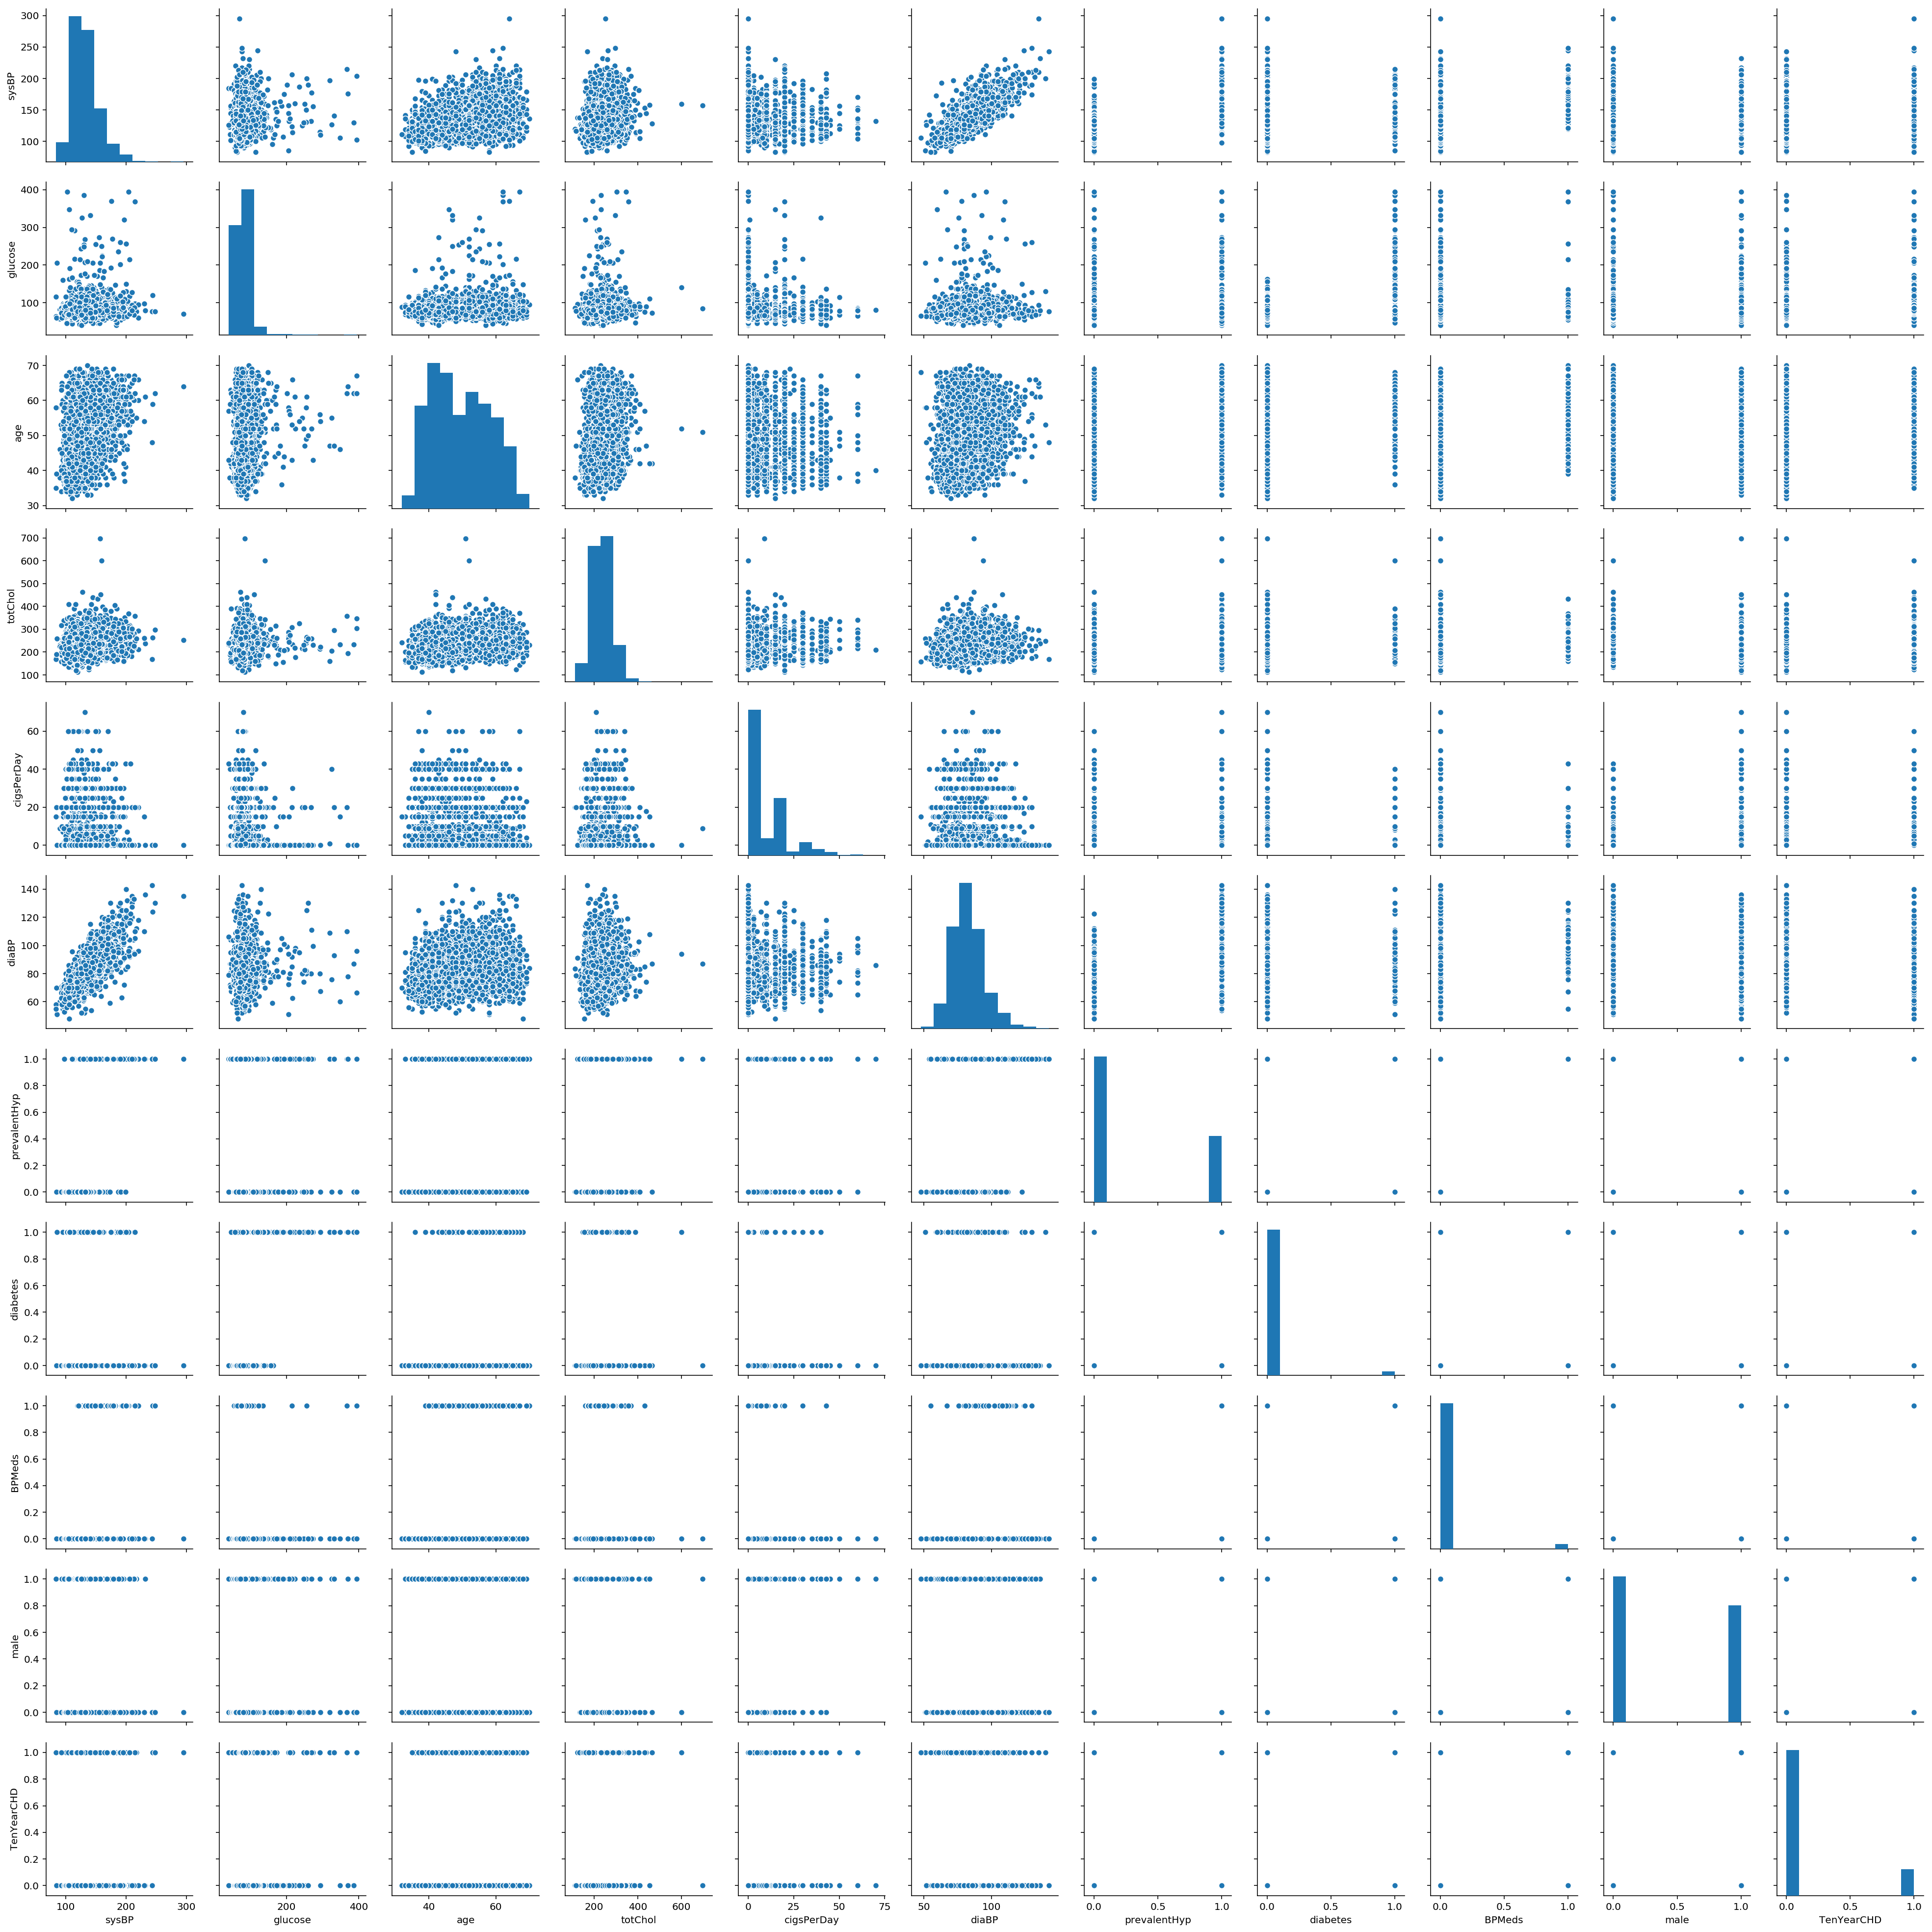

In [16]:
# Checking for outliers
df.describe()
sns.pairplot(df)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
1111,159.5,140.0,52,600.0,0.0,94.0,1,1,0.0,0,1
3160,157.0,84.0,51,696.0,9.0,87.0,1,0,0.0,1,0


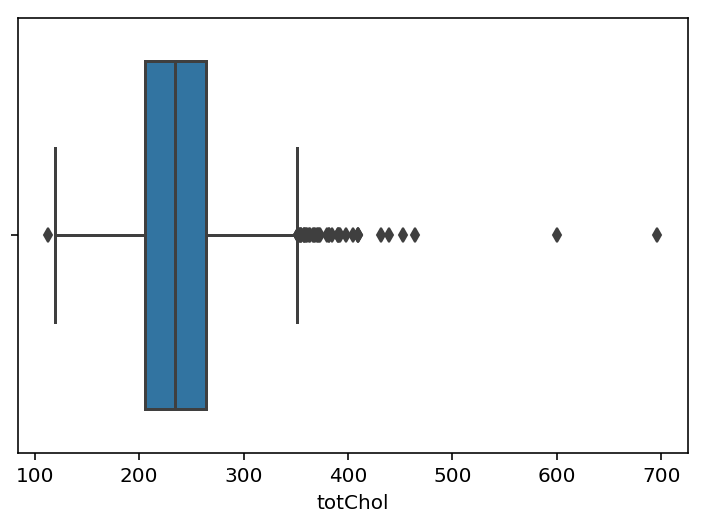

In [17]:
# Zooming into cholesterin outliers

sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

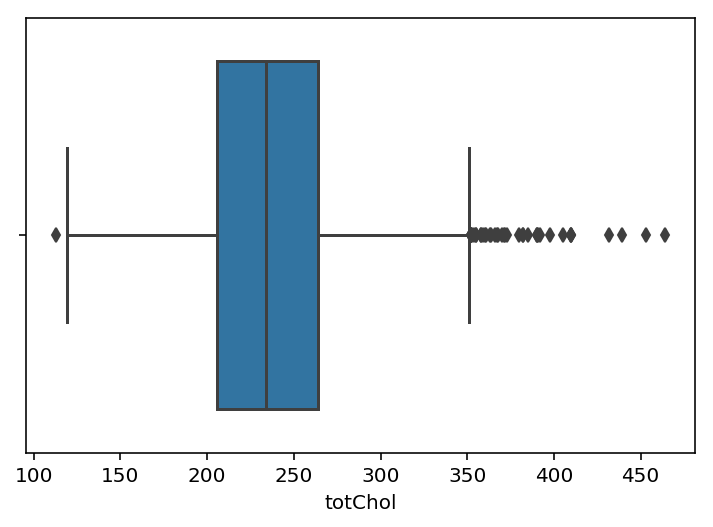

In [18]:
# Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

In [19]:
df_clean = df

## Feature Scaling <a name="paragraph2"></a>
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [20]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)


In [21]:
df_scaled.describe()
df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.230991,0.118260,0.462432,0.352447,0.128728,0.369677,0.311550,0.026941,0.030408,0.445185,0.152307
std,0.104228,0.067429,0.225589,0.124179,0.170391,0.126290,0.463189,0.161931,0.171730,0.497053,0.359366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.087571,0.263158,0.264957,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.210402,0.107345,0.447368,0.344729,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.283688,0.132768,0.631579,0.430199,0.285714,0.444444,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,132.354628,81.863964,49.572419,236.708722,9.010936,82.934516,0.311550,0.026941,0.030408,0.445185,0.152307
std,22.044275,23.869703,8.572367,43.586786,11.927370,11.934410,0.463189,0.161931,0.171730,0.497053,0.359366
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,143.500000,87.000000,56.000000,264.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,464.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


## Test - Train Split <a name="paragraph3"></a>

In [22]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

In [23]:
len(X_train)
len(X_test)

2999

750

## Resampling imbalanced Dataset <a name="paragraph4"></a>

Class 0: 3178
Class 1: 571
Proportion: 5.57 : 1


Text(0.5,0,'Heart Disease No/Yes')

Text(0,0.5,'Patient Count')

Text(0.5,1,'Count Outcome Heart Disease\n')

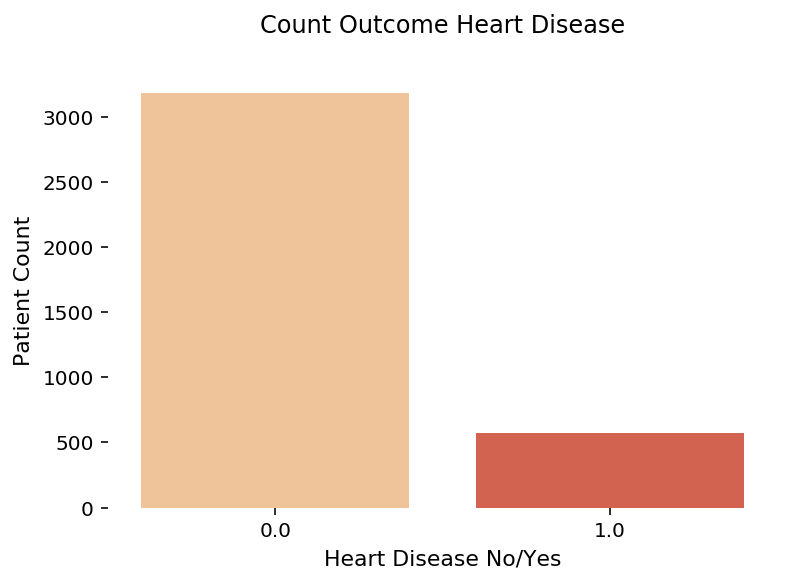

In [24]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

We can see that the proportion is 5.57:1 which is not well balanced.
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

### UNDERSAMPLING METHOD

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.


0.0    571
1.0    571
Name: TenYearCHD, dtype: int64

Text(0.5,0,'Heart Disease No/Yes')

Text(0,0.5,'Patient Count')

Text(0.5,1,'Count Outcome Heart Disease after Resampling\n')

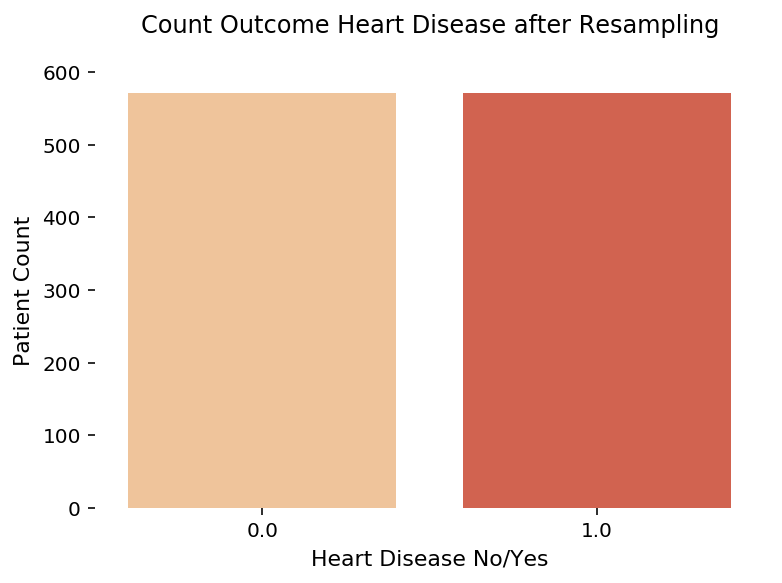

In [25]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(target_count[1],random_state=123)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

In [26]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop(['TenYearCHD'], axis = 1)

In [27]:
X_train.shape

(1142, 10)

In [28]:
X_test.shape

(750, 10)

> ## **Model Pipeline** <a name="paragraph5"></a>

### 1. Logistic Regression

In [29]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")


# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The sensitivity score for LogReg is: {round(recall,3)*100}%")

tn, fp, fn, tp = confusion_matrix(y_test, normalized_df_reg_pred).ravel()
specificity = tn / (tn+fp)
print(f"The specificity score for LogReg is: {round(specificity,3)*100}%")

auc = roc_auc_score(y_test,normalized_df_reg_pred)
print(f"The auc score for LogReg is: {round(auc,3)*100}%")



The accuracy score for LogReg is: 67.60000000000001%
The precision score for LogReg is: 30.3%
The sensitivity score for LogReg is: 71.39999999999999%
The specificity score for LogReg is: 66.8%
The auc score for LogReg is: 69.1%


In [30]:
normalized_df_reg_y_train = normalized_df_reg.predict(X_train)

In [31]:
auctrain=roc_auc_score(y_train,normalized_df_reg_y_train)
print(f"The auc score for Logistic Regression is: {round(auctrain,3)*100}%")

The auc score for Logistic Regression is: 66.7%


Text(0.5,1.1,'Confusion matrix Logistic Regression\n')

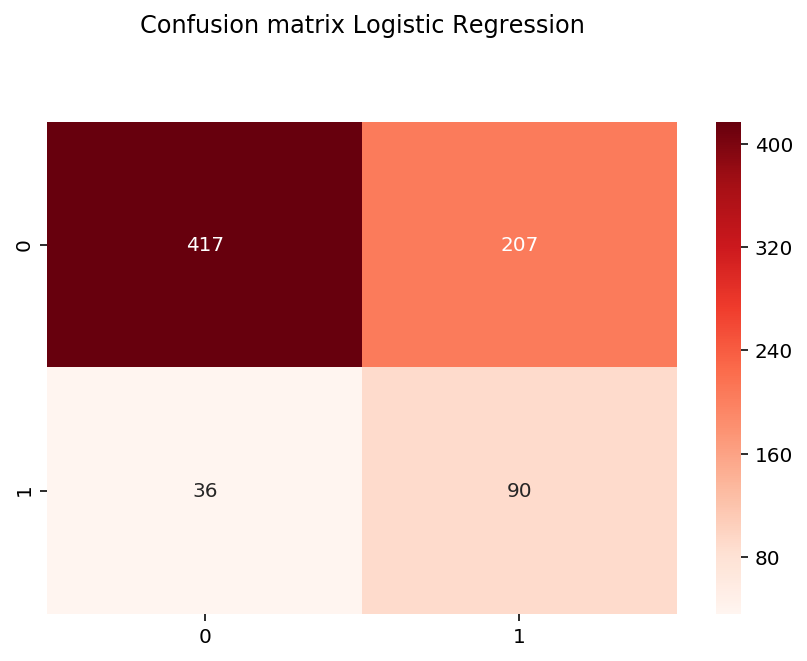

In [32]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

### 2. SVM

In [33]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")



# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The sensitivity score for SVM is: {round(recall,3)*100}%")

tn, fp, fn, tp = confusion_matrix(y_test, normalized_df_svm_pred).ravel()
specificity = tn / (tn+fp)
print(f"The specificity score for SVM is: {round(specificity,3)*100}%")

auc = roc_auc_score(y_test,normalized_df_svm_pred)
print(f"The auc score for SVM is: {round(auc,3)*100}%")


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

The accuracy score for SVM is: 65.3%
The precision score for SVM is: 28.199999999999996%
The sensitivity score for SVM is: 69.0%
The specificity score for SVM is: 64.60000000000001%
The auc score for SVM is: 66.8%


In [34]:
normalized_df_svm_y_train = svm.predict(X_train)
auc = roc_auc_score(y_train,normalized_df_svm_y_train )
print(f"The training auc score for SVM is: {round(auc,3)*100}%")

The training auc score for SVM is: 66.3%


Text(0.5,1.1,'Confusion matrix SVM\n')

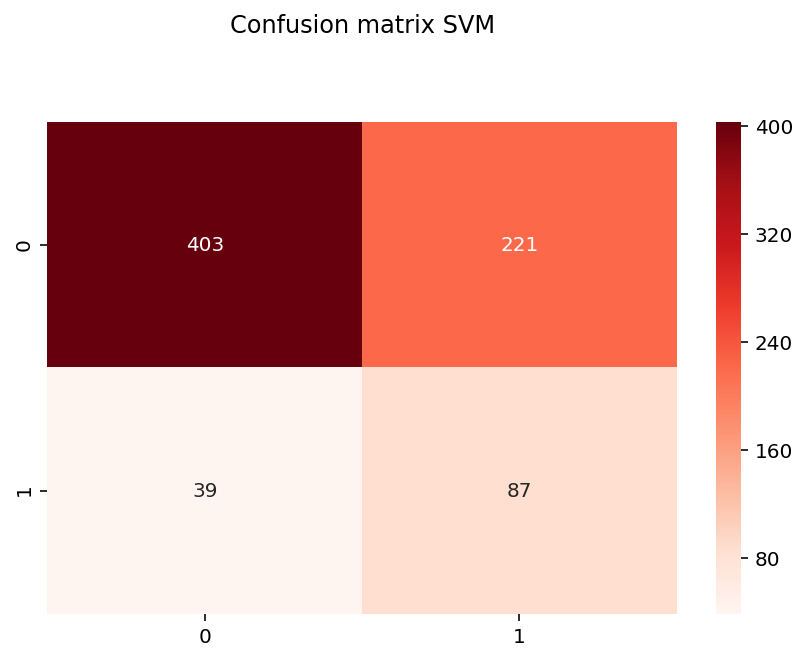

In [35]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

### 3. Decision Tree

In [36]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier(random_state=99)

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")


# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The sensitivity score for DTC is: {round(recall,3)*100}%")

tn, fp, fn, tp = confusion_matrix(y_test, normalized_df_dtc_pred).ravel()
specificity = tn / (tn+fp)
print(f"The specificity score for DTC is: {round(specificity,3)*100}%")

auc = roc_auc_score(y_test,normalized_df_dtc_pred)
print(f"The auc score for DTC is: {round(auc,3)*100}%")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

The accuracy score for DTC is: 69.19999999999999%
The precision score for DTC is: 35.3%
The sensitivity score for DTC is: 100.0%
The specificity score for DTC is: 63.0%
The auc score for DTC is: 81.5%


In [37]:
normalized_df_dtc_y_train = dtc_up.predict(X_train)
auc = roc_auc_score(y_train,normalized_df_dtc_y_train )
print(f"The training auc score for decision tree is: {round(auc,3)*100}%")

The training auc score for decision tree is: 100.0%


Text(0.5,1.1,'Confusion matrix Decision Tree\n')

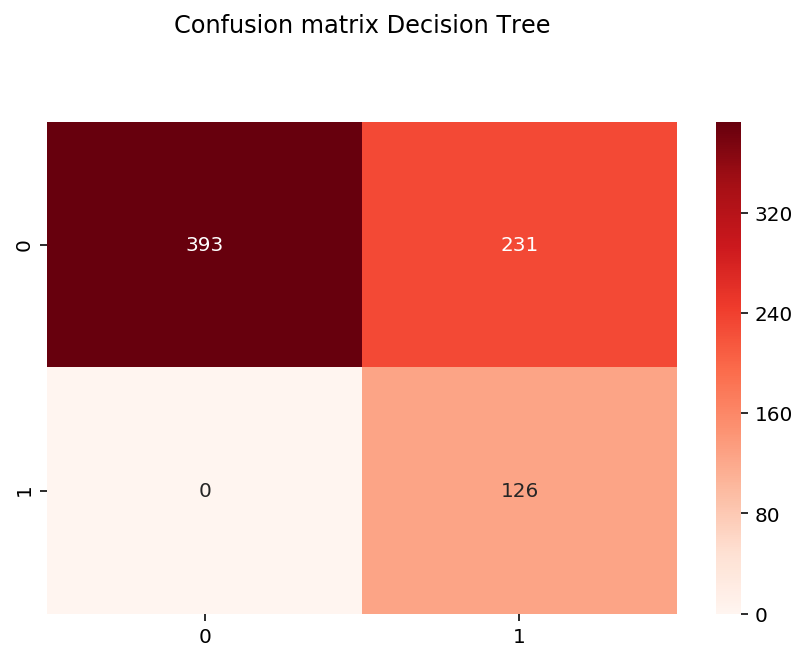

In [38]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)


### 4. KNN

In [39]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")


# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The sensitivity score for KNN is: {round(recall,3)*100}%")

tn, fp, fn, tp = confusion_matrix(y_test, normalized_df_knn_pred).ravel()
specificity = tn / (tn+fp)
print(f"The specificity score for KNN is: {round(specificity,3)*100}%")

auc = roc_auc_score(y_test,normalized_df_knn_pred)
print(f"The auc score for KNN is: {round(auc,3)*100}%")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

The accuracy score for KNN is: 80.0%
The precision score for KNN is: 42.699999999999996%
The sensitivity score for KNN is: 55.60000000000001%
The specificity score for KNN is: 84.89999999999999%
The auc score for KNN is: 70.19999999999999%


In [40]:
normalized_df_knn_pred_y_train = knn.predict(X_train)
auc = roc_auc_score(y_train,normalized_df_knn_pred_y_train)
print(f"The training auc score for KNN is: {round(auc,3)*100}%")

The training auc score for KNN is: 77.5%


### Result: The KNN model has the highest accuracy score

In [41]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")





The accuracy score of the test data is:  80.0 %
The accuracy score of the training data is:  77.5 %


**The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.**

In [42]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

'Cross Validation is used to assess the predictive performance of the models and and to judge \nhow they perform outside the sample to a new data set'

Cross-validated scores: [0.83754993 0.83466667 0.83866667 0.84379172 0.8317757 ]
The Accuracy of Model with Cross Validation is: 83.73%


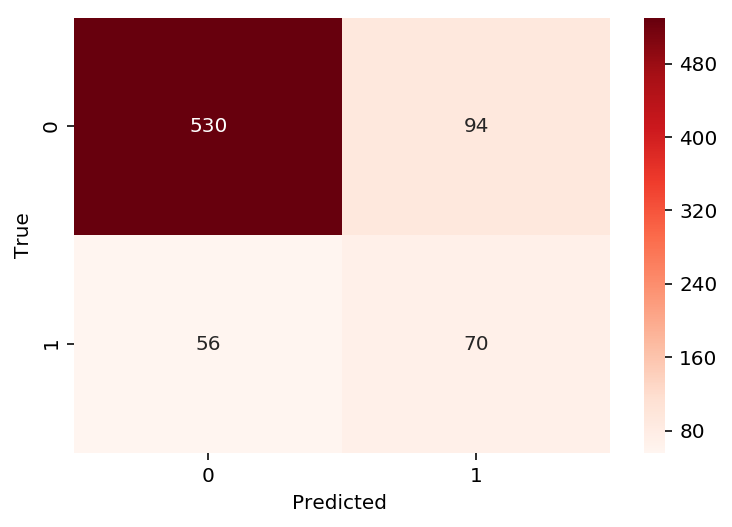

In [43]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


## Random Forest

In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=1)

In [45]:
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [46]:
normalized_rf_random_pred_y_train = rf.predict(X_train)
auc = roc_auc_score(y_train,normalized_rf_random_pred_y_train )
print(f"The training auc score for random forest is: {round(auc,3)*100}%")

The training auc score for random forest is: 97.8%


In [47]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, rf_pred)
print(f"The accuracy score for Random Forest is: {round(acc,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, rf_pred)
print(f"The precision score for Random Forest is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, rf_pred)
print(f"The sensitivity score for Random Forest is: {round(recall,3)*100}%")

tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()
specificity = tn / (tn+fp)
print(f"The specificity score for Random Forest is: {round(specificity,3)*100}%")

auc = roc_auc_score(y_test,rf_pred)
print(f"The auc score for Random Forest is: {round(auc,3)*100}%")

The accuracy score for Random Forest is: 78.7%
The precision score for Random Forest is: 43.9%
The sensitivity score for Random Forest is: 97.6%
The specificity score for Random Forest is: 74.8%
The auc score for Random Forest is: 86.2%


In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [50]:

# Random search of parameters, using 5 fold cross validation, 
# search across 10 different combinations, and use all available cores (-1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, scoring='roc_auc',verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
 

In [51]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [52]:
rf_random_y_train=rf_random.predict(X_train)
auctrain=roc_auc_score(y_train,rf_random_y_train)
print(f"The cross validated auc score for Random Forest is: {round(auctrain,3)*100}%")

The cross validated auc score for Random Forest is: 90.10000000000001%


In [53]:
rf_random_pred=rf_random.predict(X_test)

In [54]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, rf_random_pred)
print(f"The accuracy score for Random Forest is: {round(acc,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, rf_random_pred)
print(f"The precision score for Random Forest is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, rf_random_pred)
print(f"The sensitivity score for Random Forest is: {round(recall,3)*100}%")

tn, fp, fn, tp = confusion_matrix(y_test, rf_random_pred).ravel()
specificity = tn / (tn+fp)
print(f"The specificity score for Random Forest is: {round(specificity,3)*100}%")

auc = roc_auc_score(y_test,rf_random_pred)
print(f"The auc score for Random Forest is: {round(auc,3)*100}%")

The accuracy score for Random Forest is: 72.89999999999999%
The precision score for Random Forest is: 37.3%
The sensitivity score for Random Forest is: 89.7%
The specificity score for Random Forest is: 69.6%
The auc score for Random Forest is: 79.60000000000001%


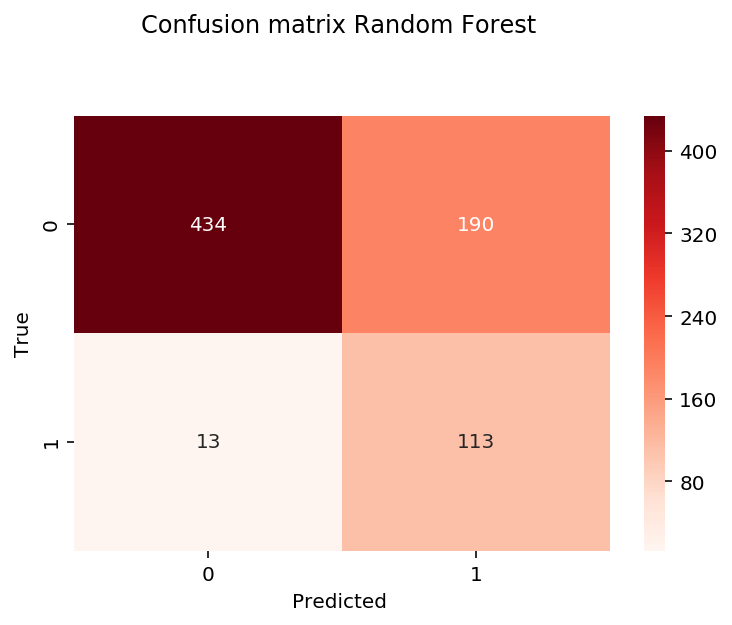

In [55]:
cnf_matrix_log = confusion_matrix(y_test, rf_random_pred)

# sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
# #ax.xaxis.set_label_position("top")
# #plt.tight_layout()
# plt.title('Confusion matrix Random Forest with randomized search CV\n\n Predicted', y=1.1)
# ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.title('Confusion matrix Random Forest \n', y=1.1)
ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


## XGBoost

In [56]:
random_grid = {'n_estimators':np.arange(10,100,10)}

In [57]:
xgboost = XGBClassifier()
xgboost.get_params
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
xgboost_y_train= xgboost.predict(X_train)
auctrain=roc_auc_score(y_train,xgboost_y_train)
print(f"The training auc score for XGBoost is: {round(auctrain,3)*100}%")

The training auc score for XGBoost is: 76.7%


In [59]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, xgboost_pred)
print(f"The accuracy score for XGBoost is: {round(acc,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, xgboost_pred)
print(f"The precision score for XGBoost is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, xgboost_pred)
print(f"The sensitivity score for XGBoost is: {round(recall,3)*100}%")

tn, fp, fn, tp = confusion_matrix(y_test, xgboost_pred).ravel()
specificity = tn / (tn+fp)
print(f"The specificity score for XGBoost is: {round(specificity,3)*100}%")

auc = roc_auc_score(y_test,xgboost_pred)
print(f"The auc score for XGBoost is: {round(auc,3)*100}%")

The accuracy score for XGBoost is: 70.1%
The precision score for XGBoost is: 33.7%
The sensitivity score for XGBoost is: 80.2%
The specificity score for XGBoost is: 68.10000000000001%
The auc score for XGBoost is: 74.1%


In [60]:
xgboost_random = GridSearchCV(xgboost,random_grid,cv=10,scoring='roc_auc',n_jobs=-1,verbose=2)
xgboost_random.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.7s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

In [72]:
xgboost_random_y_train= xgboost_random.predict(X_train)
auctrain=roc_auc_score(y_train,xgboost_y_train)
print(f"The training auc score for XGBoost is: {round(auctrain,3)*100}%")

The training auc score for XGBoost is: 76.7%


In [62]:
xgboost_random.best_params_

{'n_estimators': 60}

In [63]:
random_grid = {'max_depth': np.arange(1, 11, 1),
                'subsample': np.arange(0.25, 0.75, 0.05),
                'colsample_bytree': np.arange(0.25, 0.75, 0.05),
              'min_child_weight' : np.arange(1,6,1),
              #'n_estimators':np.arange(100,1500,100),
              'gamma':np.arange(0,0.5,0.1)}


In [64]:
random_grid

{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'subsample': array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ]),
 'colsample_bytree': array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ]),
 'min_child_weight': array([1, 2, 3, 4, 5]),
 'gamma': array([0. , 0.1, 0.2, 0.3, 0.4])}

In [65]:
xgboost = XGBClassifier(n_estimators=60)
xgboost_random = RandomizedSearchCV(xgboost,random_grid,cv=10,n_iter=10,scoring='roc_auc',n_jobs=-1,verbose=2,random_state=412)
xgboost_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=60,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   param_distributions={'colsample_bytree': array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ]),
                                        'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
          

In [66]:
xgboost_random.best_params_

{'subsample': 0.44999999999999996,
 'min_child_weight': 3,
 'max_depth': 2,
 'gamma': 0.0,
 'colsample_bytree': 0.25}

In [67]:
xgboost_random_pred = xgboost_random.predict(X_test)

In [68]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, xgboost_random_pred)
print(f"The accuracy score for XGBoost is: {round(acc,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, xgboost_random_pred)
print(f"The precision score for XGBoost is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, xgboost_random_pred)
print(f"The sensitivity score for XGBoost is: {round(recall,3)*100}%")

tn, fp, fn, tp = confusion_matrix(y_test, xgboost_random_pred).ravel()
specificity = tn / (tn+fp)
print(f"The specificity score for Random Forest is: {round(specificity,3)*100}%")

auc = roc_auc_score(y_test,xgboost_random_pred)
print(f"The auc score for XGBoost is: {round(auc,3)*100}%")


The accuracy score for XGBoost is: 69.69999999999999%
The precision score for XGBoost is: 32.5%
The sensitivity score for XGBoost is: 74.6%
The specificity score for Random Forest is: 68.8%
The auc score for XGBoost is: 71.7%


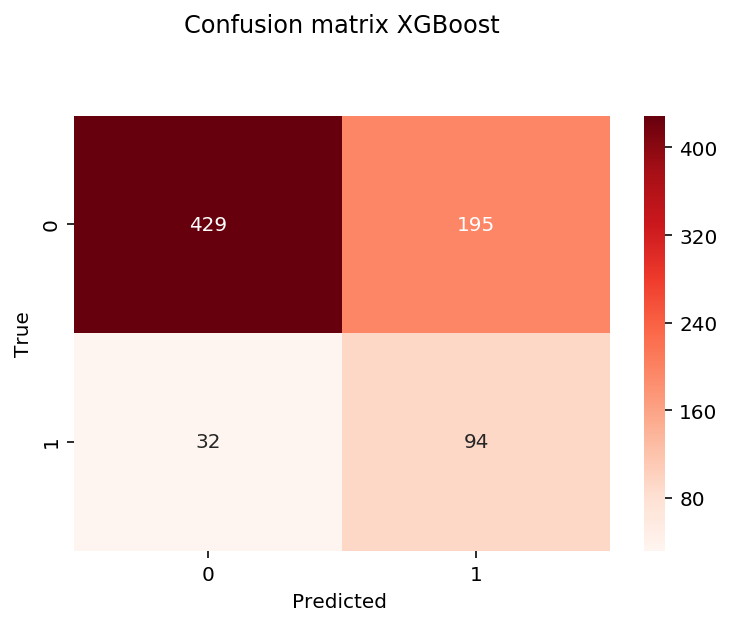

In [69]:
cnf_matrix_log = confusion_matrix(y_test, xgboost_random_pred)

# sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 
# plt.title('Confusion matrix XGBoost\n\n Predicted', y=1.1)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.title('Confusion matrix XGBoost\n', y=1.1)
ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


In [70]:
X_train.shape

(1142, 10)

In [71]:
X_test.shape

(750, 10)

## Applying the model <a name="paragraph7"></a>

In [507]:
# def start_questionnaire():
#     my_predictors = []
#     parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
#     print('Input Patient Information:')
    
#     age = input("Patient's age: >>> ") 
#     my_predictors.append(age)
#     male = input("Patient's gender. male=1, female=0: >>> ") 
#     my_predictors.append(male)
#     cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
#     my_predictors.append(cigsPerDay)
#     sysBP = input("Patient's systolic blood pressure: >>> ") 
#     my_predictors.append(sysBP)
#     diaBP = input("Patient's diastolic blood pressure: >>> ")
#     my_predictors.append(diaBP)
#     totChol = input("Patient's cholesterin level: >>> ") 
#     my_predictors.append(totChol)
#     prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
#     my_predictors.append(prevalentHyp)
#     diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
#     my_predictors.append(diabetes)
#     glucose = input("What is the Patient's glucose level? >>> ") 
#     my_predictors.append(diabetes)
#     BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
#     my_predictors.append(BPMeds)
    
#     my_data = dict(zip(parameters, my_predictors))
#     my_df = pd.DataFrame(my_data, index=[0])
#     scaler = MinMaxScaler(feature_range=(0,1)) 
   
#     # assign scaler to column:
#     my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
#     my_y_pred = knn.predict(my_df)
#     print('\n')
#     print('Result:')
#     if my_y_pred == 1:
#         print("The patient will develop a Heart Disease.")
#     if my_y_pred == 0:
#         print("The patient will not develop a Heart Disease.")
        
# start_questionnaire()